In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import io
import os
import re

In [4]:
# This function is used for transforming the true (generating) parameters onto transformed space
def transform_params(param, lower_bound, upper_bound):
    return np.log(param/(upper_bound - param + 0.001))

# Summary

1. $\alpha$ = learning rate (0 < $\alpha$ < 1)
2. $\beta$ = inverse temperature (0 < $\beta$ < 10)
3. $w$ = model-based vs. model-free (0 < $w$ < 1)
4. $\gamma$ = decay rate (0 < $\gamma$ < 1)

* Simulation codes can be found on: 
1. Stochastic 2-choice two-step task with reward probabilities: https://github.com/jungsunyoo/twosteptask-simulation/blob/master/MBMF_stochastic_2choices_p_nstates_decay_sim.m
2. Model fitting: https://github.com/jungsunyoo/twosteptask-simulation/blob/master/fit_model_2choices.m
3. Likelihood function to optimize: https://github.com/jungsunyoo/twosteptask-simulation/blob/master/likfun_2choices_TD.m


# 1. Total number of trials fixed to 200

## 1-1) TD (no counterfactual)

/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/ma/core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/ma/core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/ma/core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/anaconda3/envs/simulation/lib/python3.9

The correlation coefficient for alpha 2 stages: 0.72
The correlation coefficient for alpha 3 stages: 0.54
The correlation coefficient for alpha 4 stages: 0.58
The correlation coefficient for alpha 5 stages: 0.51
The correlation coefficient for beta 2 stages: 0.78
The correlation coefficient for beta 3 stages: 0.64


/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/ma/core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/ma/core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/ma/core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/anaconda3/envs/simulation/lib/python3.9

The correlation coefficient for beta 4 stages: 0.65
The correlation coefficient for beta 5 stages: 0.56
The correlation coefficient for w 2 stages: 0.71
The correlation coefficient for w 3 stages: 0.63


/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/ma/core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/ma/core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anacon

The correlation coefficient for w 4 stages: 0.63
The correlation coefficient for w 5 stages: 0.6
The correlation coefficient for gamma 2 stages: 0.78
The correlation coefficient for gamma 3 stages: 0.65
The correlation coefficient for gamma 4 stages: 0.69


/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/ma/core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/anaconda3/envs/simulation/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


The correlation coefficient for gamma 5 stages: 0.6


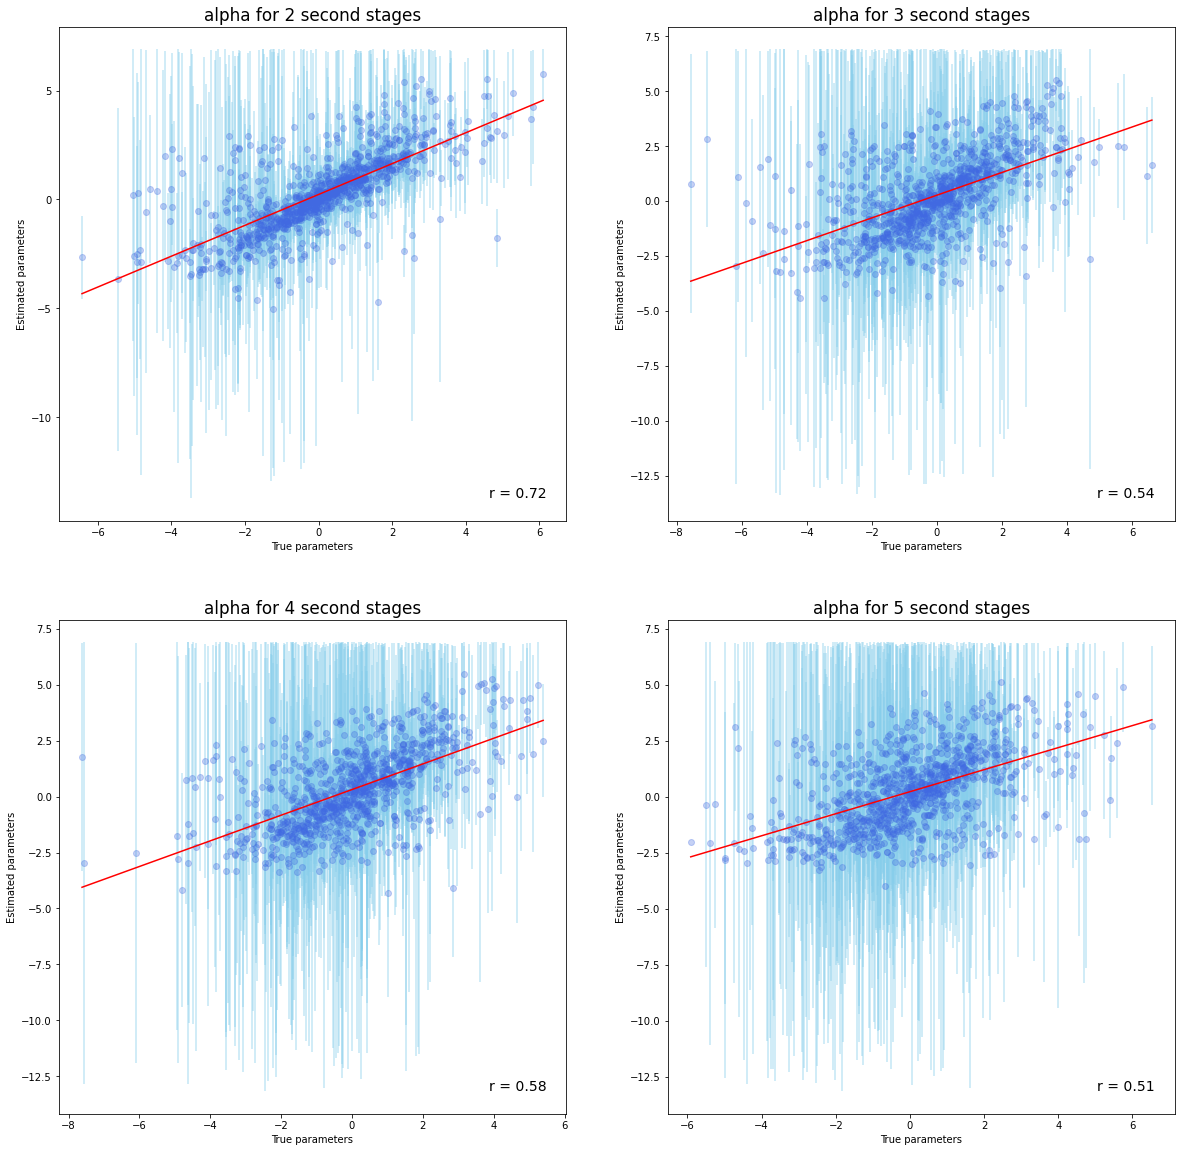

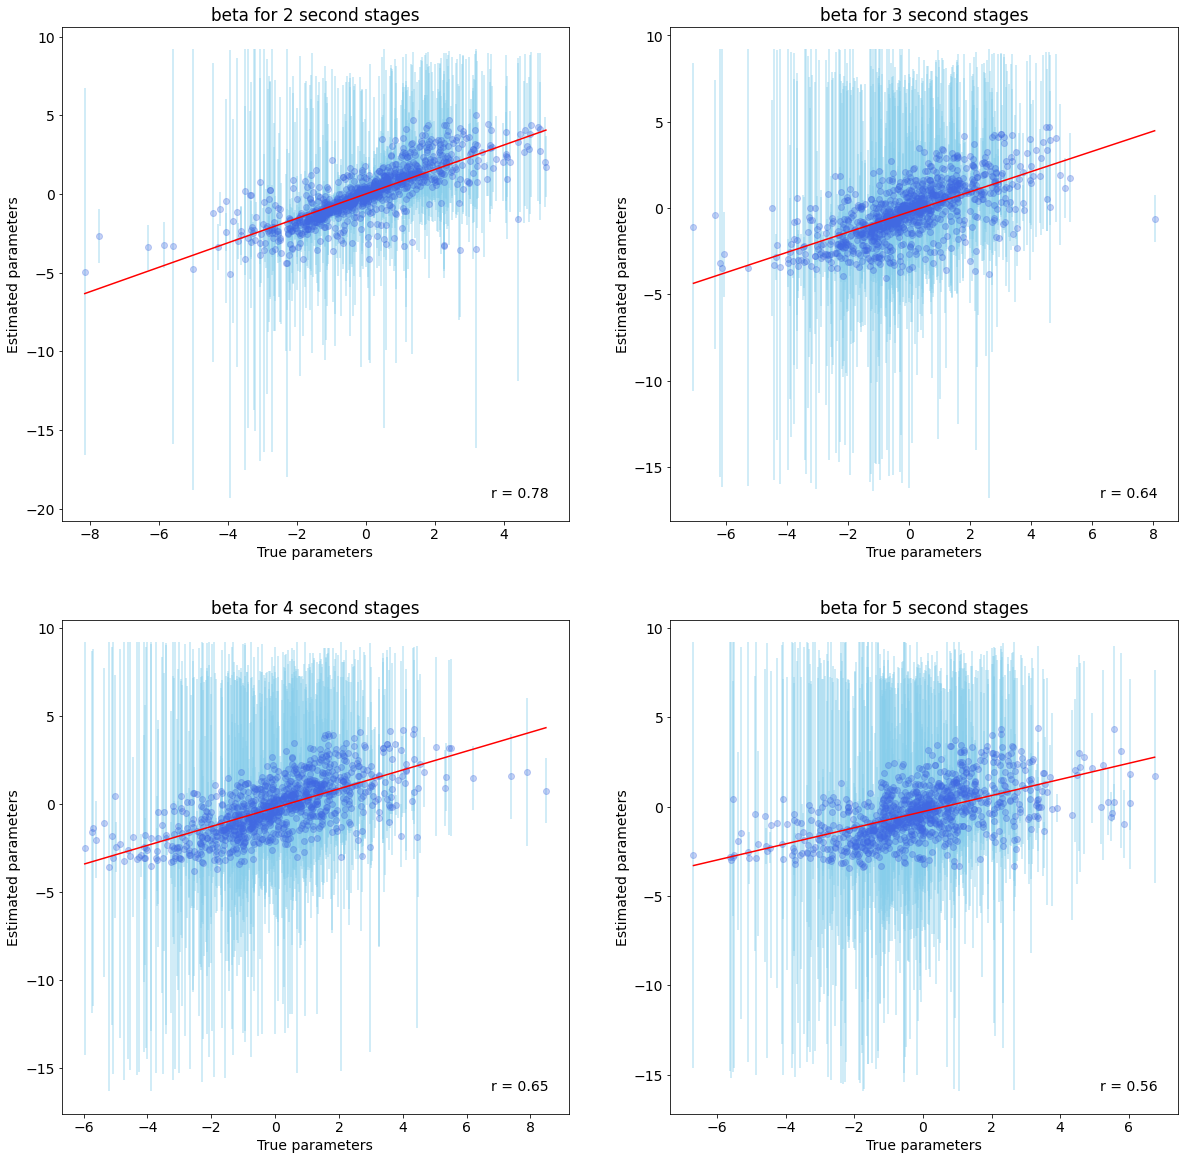

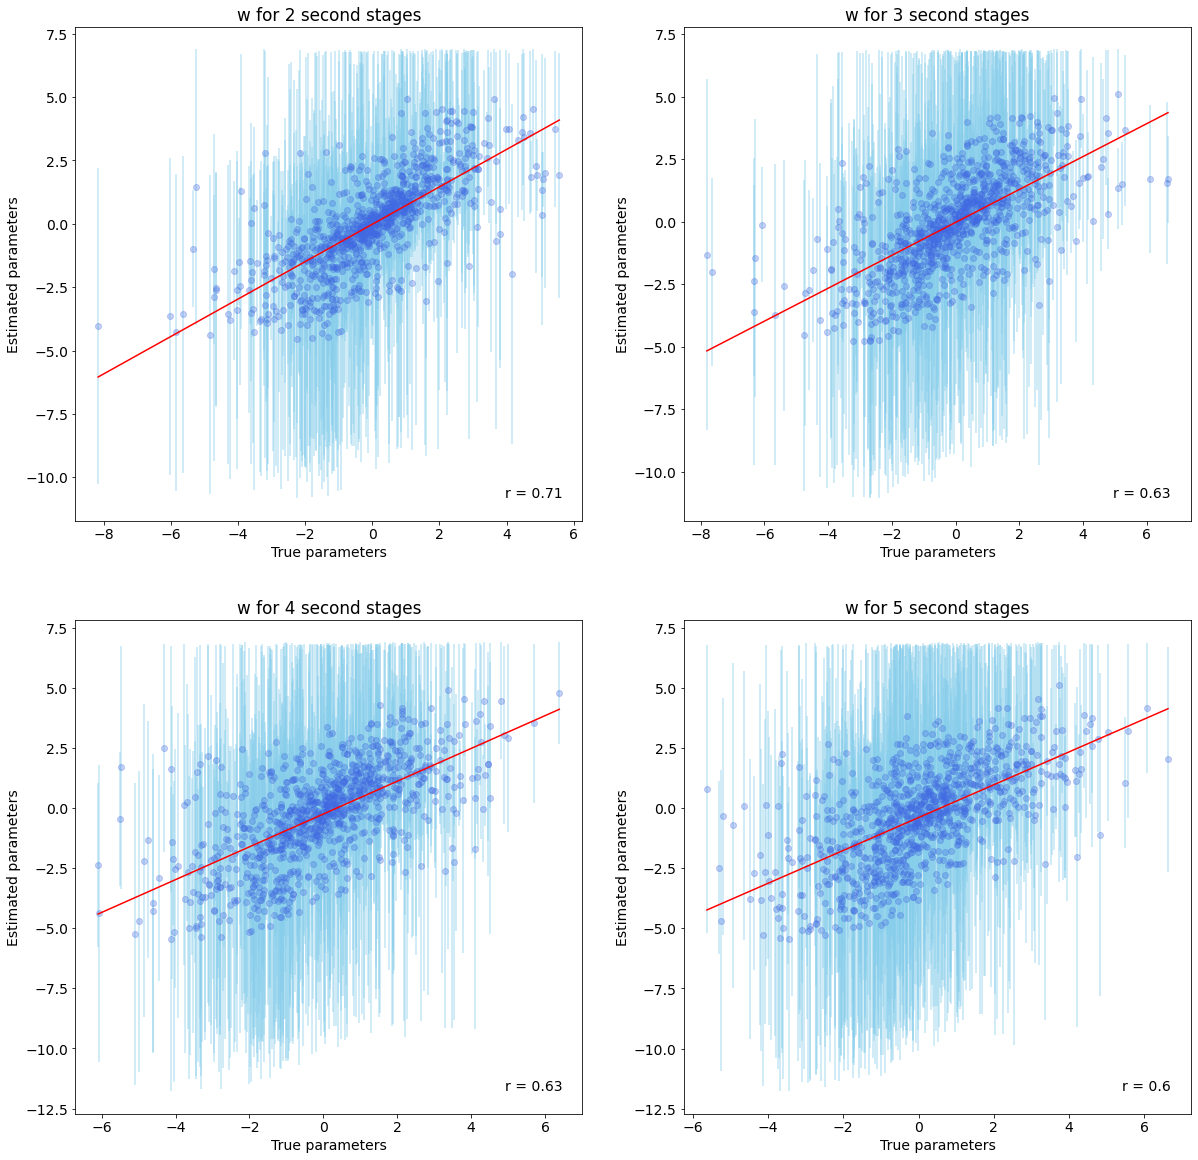

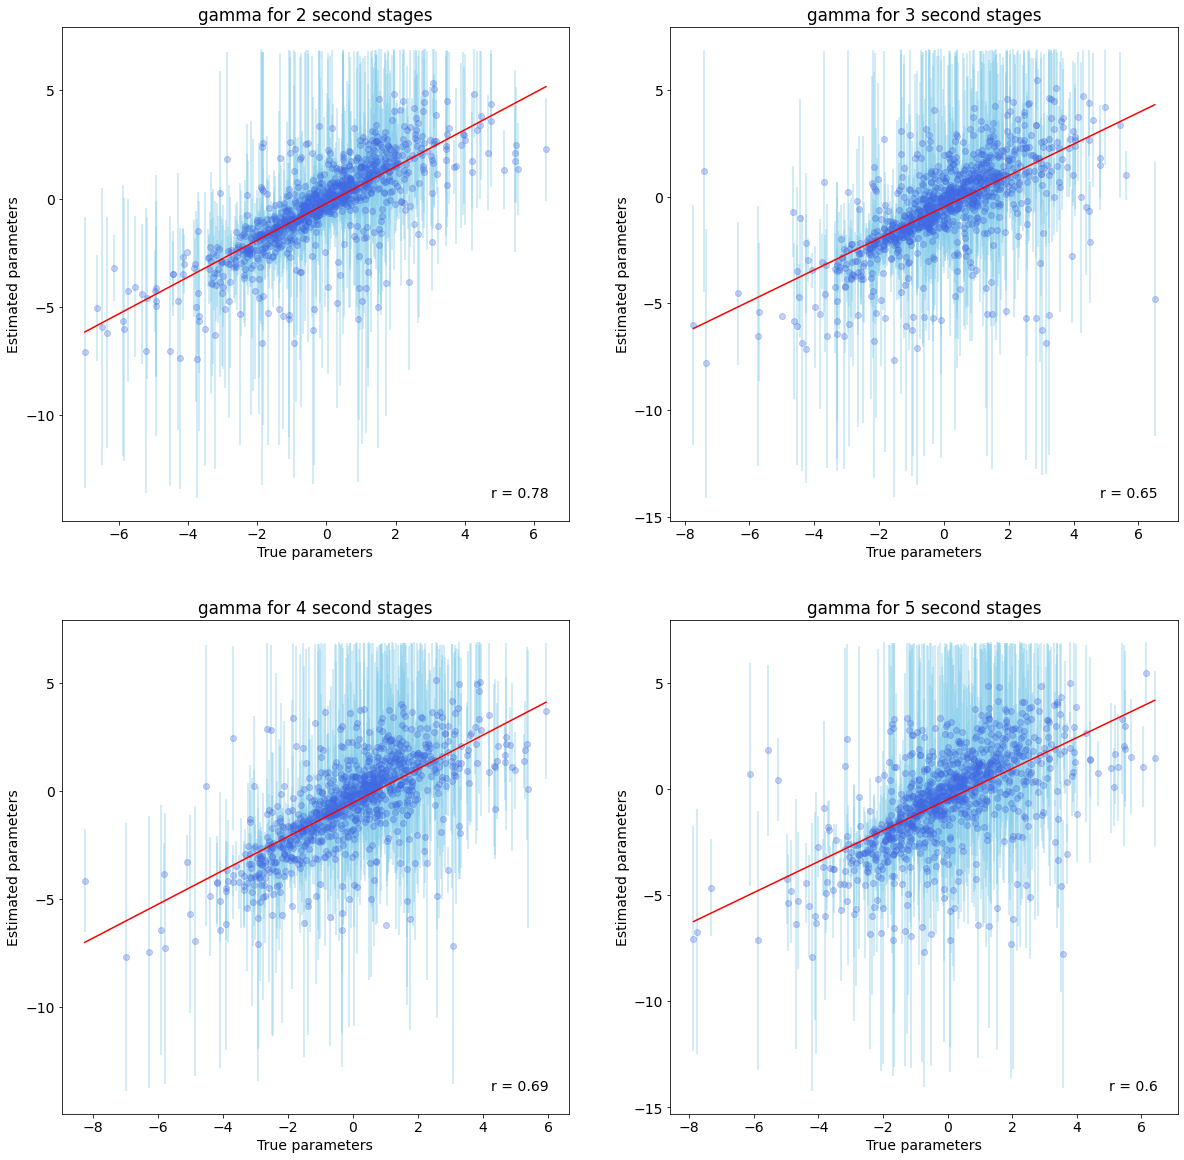

In [3]:
second_stages = [2,3,4,5]
parameters = ['alpha', 'beta', 'w', 'gamma']
datatable=[]
for i, parameter in enumerate(parameters):
    fig, axs = plt.subplots(2,2, figsize=(20,20), facecolor='w', edgecolor='k')
    for s, ax in zip(range(len(second_stages)), axs.flat):
        file = 'recovery_2choices_' + str(second_stages[s]) + 'states_5params_nrits1000.mat'

        curr_file = io.loadmat(file)
        CI_table = curr_file['data']['CI_table']
        CI_table = np.asarray(CI_table)[0][0]
        corrtable = curr_file['data']['corrtable']
        corrtable = np.asarray(corrtable)[0][0]
        raw_table = curr_file['data']['raw_recovered']
        raw_table = np.asarray(raw_table)[0][0]
        
        num_data = len(corrtable)

        x_ = corrtable[:num_data,i*2] # generating parameters
#         y_ = corrtable[:num_data,i*2+1]
        raw_recovered = raw_table[:num_data,i]
        lower_bound = 0
        upper_bound = 1
        if parameter == 'beta':
            upper_bound = 10
        transformed_param = transform_params(x_,lower_bound,upper_bound) # transform generating parameters
        
        ci_upper = CI_table[:num_data,i*2]
        ci_lower = CI_table[:num_data,i*2+1]

        x = transformed_param
        y = raw_recovered

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        n = x.size                        # number of samples
        
        ci_upper = transform_params(ci_upper, lower_bound, upper_bound)
        slope, intercept = np.polyfit(x,y,1) # linear model adjustment
        y_model = np.polyval([slope, intercept], x)   # modeling...
        
        correlation_coef = np.corrcoef(x,y)[0,1]
        r2 = correlation_coef**2
        corr_coef = np.corrcoef(transformed_param, raw_recovered)[0,1]

        # mean squared error
        MSE = 1/n * np.sum( (y - y_model)**2 )
               
        # to plot the adjusted model
        x_line = np.linspace(np.min(x), np.max(x), 100)
        y_line = np.polyval([slope, intercept], x_line)

        ############### Ploting
        plt.rcParams.update({'font.size': 14})

        title_name = parameter + ' for ' + str(second_stages[s]) + ' second stages'
        ax.set_title(title_name)
        ax.plot(x, y, 'o', color = 'royalblue', alpha=0.3)
        ax.plot(x_line, y_line, color = 'red')

#         ax.annotate('r = '+str(np.round(r2,2)),xy=(1,0),xycoords='axes fraction',
#             xytext=(-20, 20), textcoords='offset pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom')
        ax.annotate('r = '+str(np.round(corr_coef,2)),xy=(1,0),xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
    
        ax.errorbar(x,y,yerr=ci_upper-y,linestyle='',color='skyblue', alpha=.5)

        ax.set_xlabel('True parameters')
        ax.set_ylabel('Estimated parameters')
        
#         print(np.min(x))
#         print(np.max(x))
#         print(np.min(y))
#         print(np.max(y))
#         print("The r for {} {} stages: {}".format(parameter, second_stages[s], np.round(correlation_coef,2)))
#         print("The r2 for {} {} stages: {}".format(parameter, second_stages[s], np.round(r2,2)))
        print("The correlation coefficient for {} {} stages: {}".format(parameter, second_stages[s], np.round(corr_coef,2)))
        datatable.append(np.round(corr_coef,2))

# for i in datatable:
#     print(i)